# P6: Test a Perceptual Phenomenon
<b>by Daniel J. Lee</b> <br>
<b>September 16, 2017</b>

## 1. Introduction

In this project, we are investigating an experiment regarding the <b>[Stroop Effect](https://en.wikipedia.org/wiki/Stroop_effect)</b>. The purpose of this investigation is to correctly identify the components of the experiment and using statistics to draw valid conclusions.

In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv('stroopdata.csv')
print df.head()
print '\n'  + str(len(df)) + ' recorded measurements in seconds'

   Congruent  Incongruent
0     12.079       19.278
1     16.791       18.741
2      9.564       21.214
3      8.630       15.687
4     14.669       22.803

24 recorded measurements in seconds


<li type="square">In the dataset, we have a sample of recorded time measurements by 24 participants to pronounce a list of words with either a congruent or incongruent condition. We define a congruent condition as the word that actually represents its color (e.g <font color='red'><b>RED</b></font>, <font color='blue'><b>BLUE</b></font>) whereas an <i>incongruent</i> condition would be otherwise (e.g. <font color='orange'><b>PURPLE</b></font>, <font color='green'><b>ORANGE</b></font>). We would expect participants to have a lower recorded time with <i>congruent</i> word conditions than <i>incongruent</i> as shown in the portion above.</li>

## 2. Hypothesis


In this experiment, we identify our independent variable as the <i>condition of the word (congruent or incongruent)</i> that were generated for the participants to pronounce whereas our dependent variable is the <i>time</i> that it took for each participant to identify the words. Based on the information provided for congruent (C) and incongruent (IC) word conditions, the appropriate test would be the <b>t-test</b> due to the lack of information of our population. Thus we are using the given samples of the participants to make inference of the population.

In the formula below, we specify the mu as the <i>population mean</i> of the time it took for the participants to finish the test with congruent words and for the incongruent words.
<br>
<br>
<li type="square"> <b>Null Hypothesis</b>: the population mean of time recorded by participants for <i>congruent words</i> and <i>incongruent words</i> are <b>exact</b>.</li>
<li type="square"> <b>Alternate Hypothesis</b>: the population mean of time recorded by participants for <i>congruent words</i> is <b>less</b> than the average time for <i>incongruent words</i>.</li>

<img src ="./img/pic-1.png"/>

 

We are basing from the <b>one-tailed t-test</b> because we are given a sample of participants and our standard deviation of the population is unknown. In this experiment, we have two dependent samples with conditions and making inferences of the population mean based on it.

## 3. Measurements



In [9]:
print "Average time(s) for congruent: " + str(df['Congruent'].mean())
print "Average time(s) for incongruent: " + str(df['Incongruent'].mean())

Average time(s) for congruent: 14.051125
Average time(s) for incongruent: 22.0159166667


In [15]:
def sample_std(column, n):
    x = 0
    mean = column.mean()
    for i in column:
        x += (i-mean)**2
    x = (float(x /(n-1)))**0.5
    return x

sstd1 = sample_std(df['Congruent'],len(df['Congruent']))
sstd2 = sample_std(df['Incongruent'],len(df['Incongruent']))

print "Sample standard deviation for congruent: " + str(sstd1)
print "Sample standard deviation for incongruent: " + str(sstd2)

Sample standard deviation for congruent: 3.55935795765
Sample standard deviation for incongruent: 4.79705712247


<li type="square"> We measured the central tendency for both <i>congruent</i> and <i>incongruent</i> above. As expected, the average time it took a participant to pronounce congruent words is less than incongruent words.</li>
<li type="square"> Since only samples of participants were provided, the sample standard deviation was used to generalize the population standard deviation.</li>

## 4. Visualization

Populating the interactive namespace from numpy and matplotlib


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c132310>]], dtype=object)

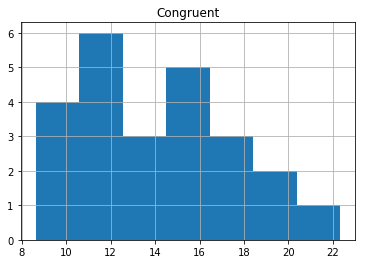

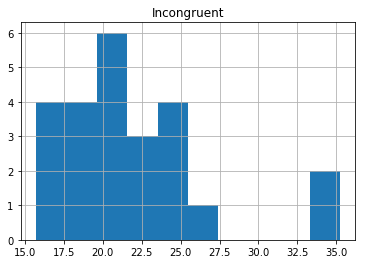

In [11]:
%pylab inline
df.hist('Congruent',bins=7)
df.hist('Incongruent')

<li type="square"> Based on the visualizations above, we can see that there is an outlier in the performance for incongruent words. We expected the distribution of congruent word performance to be normally distributed but tends to be more positive-skewed.

## 5. Results

<li type="square">Using the provided <b>[t-table](https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg)</b>, we were able to get a critical t-score of <b>1.714</b> (df = 23, alpha = 0.05). Note we are using the <b>one-tailed t-test</b> since the alternate hypothesis is that the average time for performance with incongruent words would be higher than performance with congruent words.</li> In the calculation below, we are taking the difference of the results of the incongruent test from the results with congruent word lists.

In [12]:
df['Difference'] = df['Incongruent'] - df['Congruent']
df.head(3)

,Congruent,Incongruent,Difference
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650


In [17]:
#Performing calculations for t-test
from __future__ import division
mean_diff = df['Difference'].mean()
sstd_diff = sample_std(df['Difference'],len(df['Difference']))
n=len(df)
standard_error = sstd_diff/sqrt(n)

t = mean_diff/standard_error
print 'Results: t(23) = ' + str(t) + ', ' + 'p < 0.00001 , one-tailed'

Results: t(23) = 8.02070694411, p < 0.00001 , one-tailed


<li type="square"> Based on the calculation above, we have an t-score of 8.02 and p-value of &lt; .00001 using the calculator [here](http://www.socscistatistics.com/pvalues/tdistribution.aspx). The result is <b>statistically significant</b> since the p-value is less than the alpha of 0.05, indicating to <b>reject the null hypothesis</b>. As expected, we assumed the average performance of congruent words to be <i>less</i> than with incongruent words.

In [19]:
# Other statistical results

# Cohen's d
standard_error = sstd_diff / len(df)
print "Cohen's d: " + str(standard_error)

# r^2
r = (t**2)/((t**2) + (n-1))
print "r: " + str(r)

Cohen's d: 0.202701121265
r: 0.736636416145


<li type="square"> We obtained the Cohen's d of 0.2027 indicating that the difference of means (effect size) are 20.27% of the standard deviation apart.</li>
<li type="square"> R-value of 0.7366 indicates that 73.66% of the differences in the average time performance are due to the type of tests.</li>

## 6. Conclusion

For this investigation, we were given a sample of the time performances of participants to complete a list of congruent and incongruent words. Since we are only given the sample, we generated the null and alternate hypothesis for the population mean. We performed the <b>one-tailed t-test for dependent samples</b> to make inferences of the population mean. The results obtained indicate that it is <b>statistically significant</b> and we reject our null hypothesis.

## Reference

https://en.wikipedia.org/wiki/Stroop_effect<br>
http://www.htmlhelp.com/reference/html40/entities/symbols.html<br>
https://en.wikipedia.org/wiki/Central_tendency<br>
http://www.statisticshowto.com/when-to-use-a-t-score-vs-z-score/<br>
https://statistics.laerd.com/statistical-guides/measures-of-spread-standard-deviation.php<br>